In [1]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

from gendis.genetic import GeneticExtractor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from tools.data_extraction import DataExtractor
from tools.trajectory_generator import TrajectoryGenerator
from tools.utils import standardize_data, print_genetic_param, print_settings, set_movements, angle_diff
from tools.experiments import Experiments

np.random.seed(1337)  # Random seed for reproducibility

tr_gen_options = {"samples": 25,
                  "freq": 3,
                  "reset_data": True}
dt_gen_options = {"n_test": 150}

train_test_options = {"split": 25}

df_csv_options = {"ts_class": "Bearing"}

gen_options = {"population_size": 20,
               "iterations": 20,
               "verbose": True,
               "normed": True,
               "add_noise_prob": 0.0,
               "add_shapelet_prob": 0.3,
               "wait": 10,
               "plot": True,
               "remove_shapelet_prob": 0.3,
               "crossover_prob": 0.66,
               "n_jobs": 4}

settings = {"trajectory_generator_options": tr_gen_options,
            "data_generation_options": dt_gen_options,
            "train_test_options":train_test_options,
            "define_csvs_option": df_csv_options,
            "genetic_options": gen_options}

tr_gen_options = settings["trajectory_generator_options"]
dt_gen_options = settings["data_generation_options"]
df_csvs_options = settings["define_csvs_option"]
train_test_options = settings["train_test_options"]
genetic_options = settings["genetic_options"]

first_movement = ['sector_pattern_left']
second_movement = ['random']
movements = {'first_movement': first_movement,'second_movement': second_movement}
set_movements(movements)


In [2]:
# Create files if not created
tr_gen = TrajectoryGenerator(**tr_gen_options)
tr_gen.data_generation(**dt_gen_options)
# Read in the datafiles
dex = DataExtractor()
train_df, test_df = dex.train_test_dataframes(**train_test_options)
print("The train samples length is:{0}".format(len(train_df[0] * train_test_options["split"]*2)))
print("The test samples length is:{0}\n".format(len(test_df[0] * train_test_options["split"]*2)))
dex.define_csv(**df_csvs_options)

x_train, y_train, x_test, y_test = dex.load_datasets()


Create directory 'data' 
now creating data for movement: sector_pattern_left
now creating data for movement: random
Done with generator

Reading the data files....Done reading files
The train samples length is:6000
The test samples length is:1500

Creating x_train.csv--y_train.csv and x_test.csv--y_test.csv ...Done with train.csv ...Done with test.csv
Loading the csv files to the appropriate train and test arrays(nparrays)...Done


In [3]:
#x_train=angle_diff(x_train)
#x_test=angle_diff(x_test)


In [4]:
y_test

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1])

In [5]:
# # Visualize the timeseries in the train and test set
# colors = ['r', 'b', 'g', 'y', 'c']
# plt.figure(figsize=(20, 10))
# for ts, label in zip(x_train, y_train):
#     plt.plot(range(len(ts)), ts, c=colors[int(label%len(colors))])
# plt.title('The timeseries in the train set')
# plt.show()

# plt.figure(figsize=(20, 10))
# for ts, label in zip(x_test, y_test):
#     plt.plot(range(len(ts)), ts, c=colors[int(label%len(colors))])
# plt.title('The timeseries in the test set')
# plt.show()

standardized train and test data

Starting fit in genetic extractor with:
population size:20
iterations: 20
normed: True
noise_prob: 0.0
add_shapelet_prob: 0.3
remove_shapelet_prob: 0.3
crossover_prob: 0.66



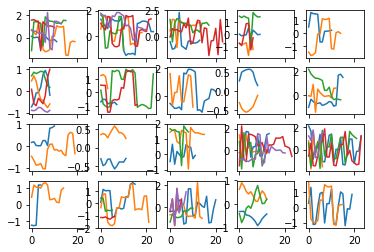

it		avg		std		max		time
1		-0.5062		0.038		-0.385024	11.5344
2		-0.446		0.071		-0.313719	10.8535
3		-0.3832		0.071		-0.313719	10.7946
4		-0.3736		0.052		-0.296024	14.8643
5		-0.3707		0.061		-0.296024	13.5889
6		-0.3961		0.052		-0.296024	13.9126
7		-0.3175		0.079		-0.185212	14.2666
8		-0.2496		0.041		-0.185212	17.6473
9		-0.2157		0.055		-0.15127	23.3378
10		-0.1567		0.027		-0.122555	24.7364
11		-0.1406		0.012		-0.122555	22.0256
12		-0.1386		0.011		-0.122555	26.6565
13		-0.124		0.013		-0.106053	24.9046
14		-0.117		0.007		-0.106053	27.9779
15		-0.112		0.009		-0.098699	26.0739
16		-0.1085		0.01		-0.095702	21.9629
17		-0.1017		0.01		-0.085681	31.9658
18		-0.1076		0.011		-0.085681	32.9114
19		-0.1049		0.01		-0.085681	31.0756
20		-0.1056		0.009		-0.085681	32.374


In [6]:
print("standardized train and test data\n")
x_train, x_test = standardize_data(x_train, x_test)
genetic_extractor = GeneticExtractor(**genetic_options)
print_genetic_param(genetic_extractor)
genetic_extractor.fit(x_train, y_train)

In [7]:
distances_train = genetic_extractor.transform(x_train)
distances_test = genetic_extractor.transform(x_test)
lr = LogisticRegression()
lr.fit(distances_train, y_train)

# Print the accuracy score on the test set
accuracy_result = accuracy_score(y_test, lr.predict(distances_test))
print('Accuracy = {}'.format(accuracy_result))

Accuracy = 0.95
